In [1]:
from datetime import datetime
from typing import List, Optional
from dataclasses import dataclass, fields


@dataclass
class Adventurer:
    name: str
    profession: str
    level: int
    affinity: str

        
@dataclass
class QuestGiver:
    name: str
    faction: Optional[str]
    location: str

        
@dataclass
class Quest:
    name: str
    giver: QuestGiver
    reward_gold: int

        
@dataclass
class Party:
    name: str
    formed_datetime: datetime
    members: List[Adventurer]
    active_quest: Optional[Quest]


In [2]:
Party.__mro__

(__main__.Party, object)

In [3]:
Party.__annotations__

{'name': str,
 'formed_datetime': datetime.datetime,
 'members': typing.List[__main__.Adventurer],
 'active_quest': typing.Union[__main__.Quest, NoneType]}

In [4]:
from typing import get_type_hints

In [5]:
get_type_hints(Party)

{'name': str,
 'formed_datetime': datetime.datetime,
 'members': typing.List[__main__.Adventurer],
 'active_quest': typing.Union[__main__.Quest, NoneType]}

In [6]:
dir(Party)

['__annotations__',
 '__class__',
 '__dataclass_fields__',
 '__dataclass_params__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [7]:
fields(Party)[2]

Field(name='members',type=typing.List[__main__.Adventurer],default=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)

In [8]:
fields(Party)[2].name

'members'

In [9]:
fields(Party)[2].type

typing.List[__main__.Adventurer]

In [10]:
type(fields(Party)[2].type)

typing._GenericAlias

In [11]:
from typing import _GenericAlias

In [12]:
isinstance(fields(Party)[2].type, _GenericAlias)

True

In [13]:
str(fields(Party)[2].type)

'typing.List[__main__.Adventurer]'

In [14]:
from typing import get_origin, get_args

In [15]:
(get_origin(fields(Party)[2].type), get_args(fields(Party)[2].type))

(list, (__main__.Adventurer,))

In [16]:
fields(Party)[3].type

typing.Union[__main__.Quest, NoneType]

In [17]:
Adventurer.__name__

'Adventurer'

In [18]:
isinstance(fields(Party)[3].type, type)

False

In [19]:
(get_origin(fields(Party)[3].type), get_args(fields(Party)[3].type))

(typing.Union, (__main__.Quest, NoneType))

In [20]:
origin = get_origin(fields(Party)[3].type)
args = get_args(fields(Party)[3].type)
from typing import Union

origin is Union and type(None) in args


True

In [21]:
get_origin(str)

In [22]:
get_args(str)

()

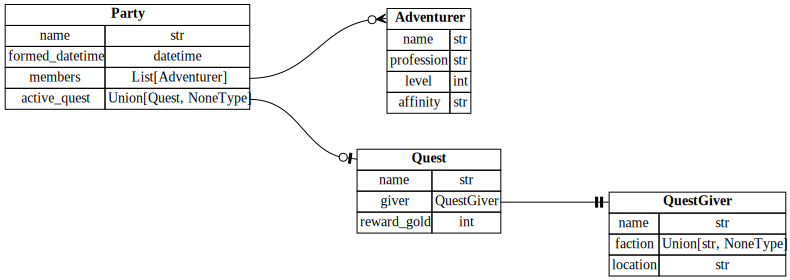

In [23]:
from erdantic import create_erd

diagram = create_erd(Party)
diagram

In [24]:
print(diagram.to_dot())

strict digraph "" {
	graph [nodesep=0.5,
		rankdir=LR,
		ranksep=1.5
	];
	node [label="\N",
		shape=plain
	];
	Party	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Party</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>formed_datetime</td><td port="formed_datetime">datetime</td></tr><tr><td>members</td><td port="members">List[Adventurer]</td></tr><tr><td>active_quest</td><td port="active_quest">Union[Quest, NoneType]</td></tr></table>>];
	Quest	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Quest</b></td></tr><tr><td>name</td><td port="name">str</td></tr><tr><td>giver</td><td port="giver">QuestGiver</td></tr><tr><td>reward_gold</td><td port="reward_gold">int</td></tr></table>>];
	Party:active_quest:e -> Quest:_root:w	[arrowhead=noneteeodot];
	Adventurer	[label=<<table border="0" cellborder="1" cellspacing="0"><tr><td port="_root" colspan="2"><b>Adventurer</b></td></tr><tr><td>n

In [25]:
from typing import List

In [26]:
type(List)

typing._GenericAlias

In [27]:
diagram.models

{DataClassModel(dataclass=<class '__main__.Adventurer'>),
 DataClassModel(dataclass=<class '__main__.Party'>),
 DataClassModel(dataclass=<class '__main__.Quest'>),
 DataClassModel(dataclass=<class '__main__.QuestGiver'>)}

In [28]:
list(diagram.models)[0].fields

[DataClassField(dataclass_field=Field(name='name',type=<class 'str'>,default=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)),
 DataClassField(dataclass_field=Field(name='formed_datetime',type=<class 'datetime.datetime'>,default=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)),
 DataClassField(dataclass_field=Field(name='members',type=typing.List[__main__.Adventurer],default=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,default_factory=<dataclasses._MISSING_TYPE object at 0x7fe0a148b4f0>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),_field_type=_FIELD)),
 DataClassField(dataclass_field=Field(name='active_quest',type=typing.Union[__main_

In [29]:
from erdantic import erd

In [30]:
erd.implementation_registry

{'dataclass': {'type_checker': <function erdantic.dataclasses.is_dataclass(obj: Any) -> bool>,
  'constructor': <function erdantic.dataclasses.create_erd(*models: type) -> erdantic.erd.EntityRelationshipDiagram>},
 'pydantic': {'type_checker': <function erdantic.pydantic.is_pydantic_model(obj: Any)>,
  'constructor': <function erdantic.pydantic.create_erd(*models: Type[pydantic.main.BaseModel]) -> erdantic.erd.EntityRelationshipDiagram>}}